In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import os
from math import ceil

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, concatenate, LeakyReLU, ReLU, Embedding, Activation

from IPython.display import clear_output, display

import matplotlib.colors as mcolors
import matplotlib
import matplotlib.pyplot as plt

import tensorflow_probability as tfp
tfd = tfp.distributions
tableGAN_path = ".\\tableGAN.ipynb"
image_dir = "Images//"
utils_path = ".//utils.ipynb"

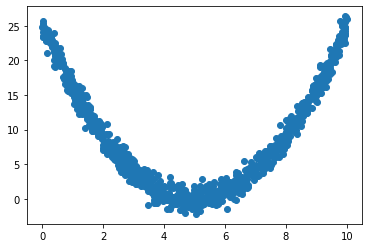

In [7]:
n_train = 1000
x1 = np.random.uniform(0, 10, n_train)
x2 = np.random.normal((x1-5)**2, 1, n_train)
#dummy = np.random.randint(0, 2, size = n_train).astype(str)
dummy = "dummy"
data_toy = pd.DataFrame({"x1" : x1, "x2" : x2, "dummy" : dummy})
plt.scatter(data_toy["x1"], data_toy["x2"])

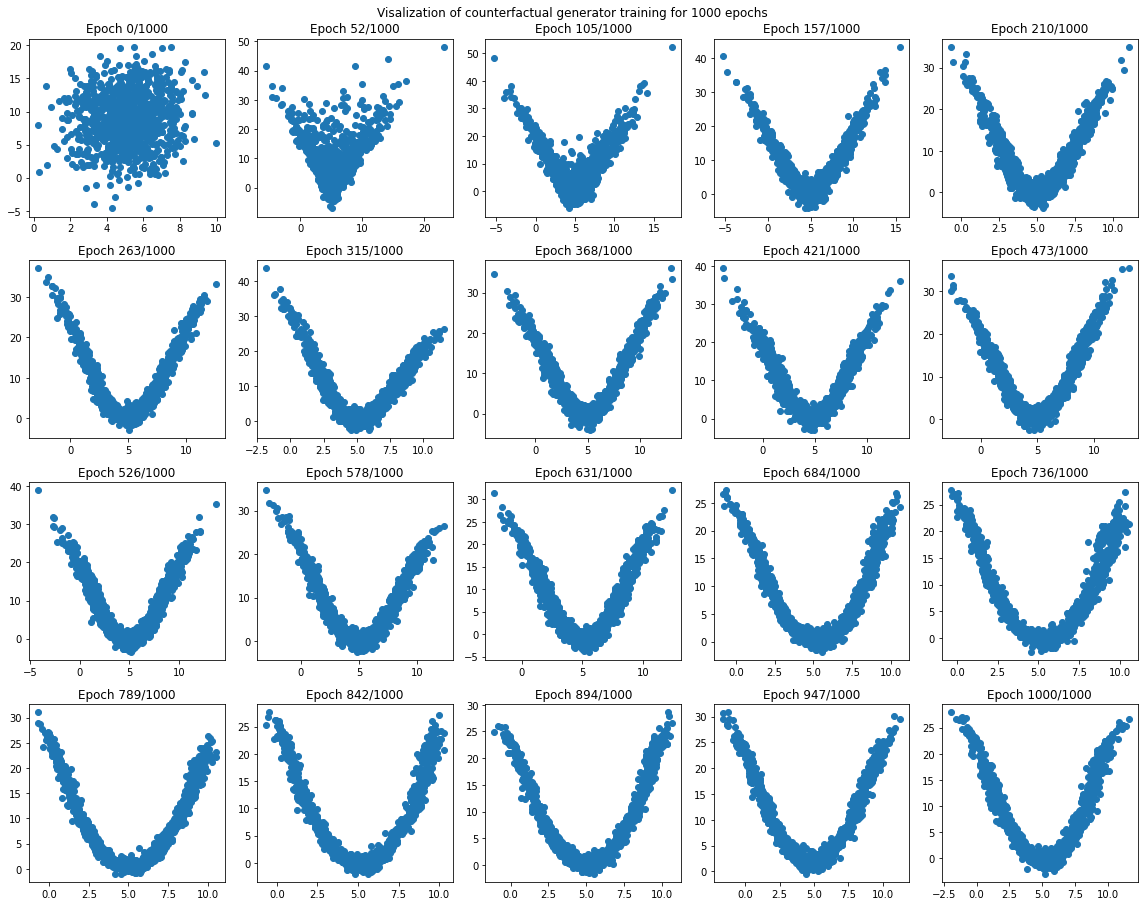

In [45]:
%run "$tableGAN_path"
tgt = TableGAN(data_toy)
fig_l, fig_2D = tgt.train(1000, plot2D_image = True)

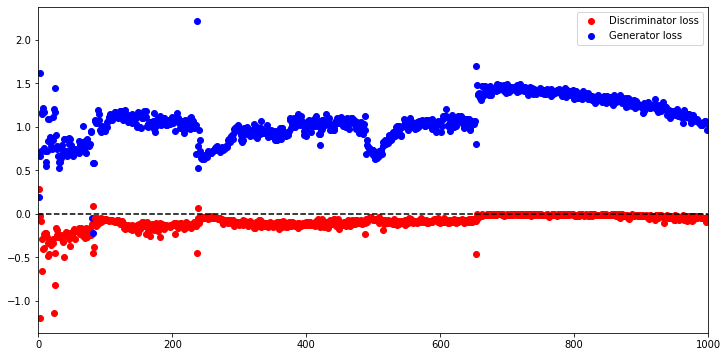

In [46]:
fig_l

In [47]:
tgt.generate_data()

,x1,x2,dummy
0,7.736111,8.023499,dummy
1,9.173245,19.187952,dummy
2,1.402518,11.905889,dummy
3,8.980300,17.587339,dummy
4,0.095947,21.156538,dummy
...,...,...,...
995,2.401468,8.096679,dummy
996,2.983463,4.404132,dummy
997,9.283072,17.802601,dummy
998,8.774569,9.705588,dummy


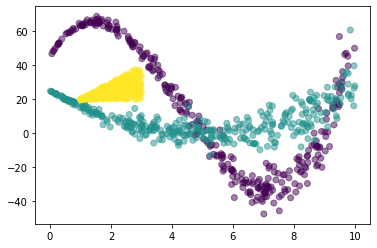

In [21]:
%run "$tableGAN_path"
%run "$utils_path"

n_train = 1000

x1 = np.random.uniform(0, 10, n_train)

labels = np.random.randint(0,3, n_train)
label_value, counts = np.unique(labels, return_counts =True)
index_end = np.cumsum(counts)
index_start = np.append([0], index_end[:len(index_end)-1])
x1 = np.empty(n_train)
x2 = np.empty(n_train)

for i in range(len(label_value)):
    if label_value[i] in [0,1]:
        x1_curr = np.random.uniform(0, 10, counts[i])
        x2_curr = np.random.normal(np.where(label_value[i] == 1, (x1_curr-5)**2, (x1_curr+1) * (x1_curr-5) * (x1_curr-9)),
                      x1_curr, counts[i])
    elif label_value[i] == 2:
        x1_curr = np.random.uniform(1,3, counts[i])
        x2_curr = np.random.uniform(20, (x1_curr - 1) * 10 + 20, counts[i])
    else:
        print("Something wrong")
        
    x1[index_start[i]:index_end[i]] = x1_curr
    x2[index_start[i]:index_end[i]] = x2_curr
    labels[index_start[i]:index_end[i]] = label_value[i]

data_toy2 = pd.DataFrame({"x1" : x1, "x2" : x2, "labels" : labels.astype(str)})
plt.scatter(data_toy2["x1"], data_toy2["x2"], c = map_str_to_color(data_toy2["labels"]), alpha=0.5)
plt.savefig(os.path.join(image_dir, "synthetic2.jpg"))

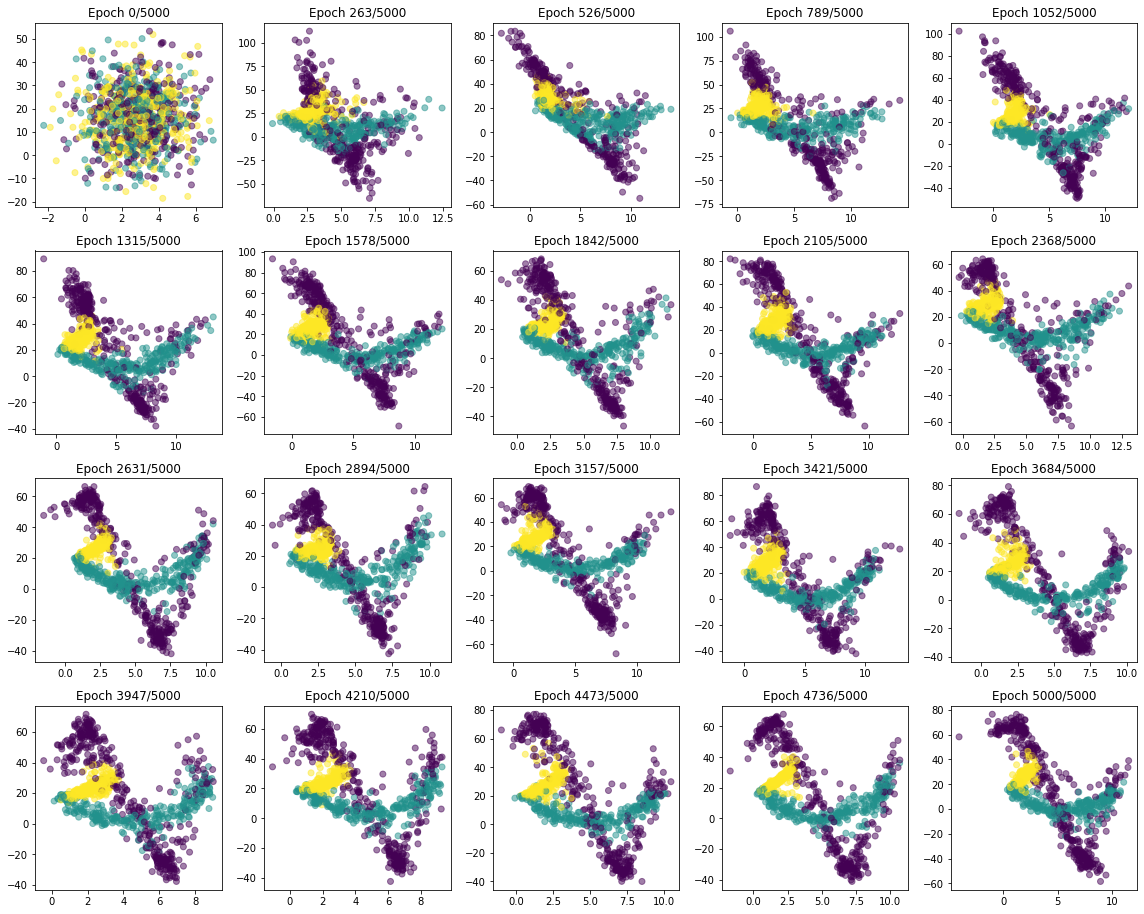

In [20]:
%run "$tableGAN_path"
tgt2 = TableGAN(data_toy2, n_critic = 5, quantile_transformation_int = False)
fig2_l, fig2_2D = tgt2.train(5000, 500, plot2D_image = True, plot2D_discrete_col ="labels",
                            save_dir = image_dir, filename_plot2D = "synthetic2_plot2D.jpg",
                            filename_train_loss = "synthetic2_train_loss.jpg", 
                            loss_plot_type = "line")

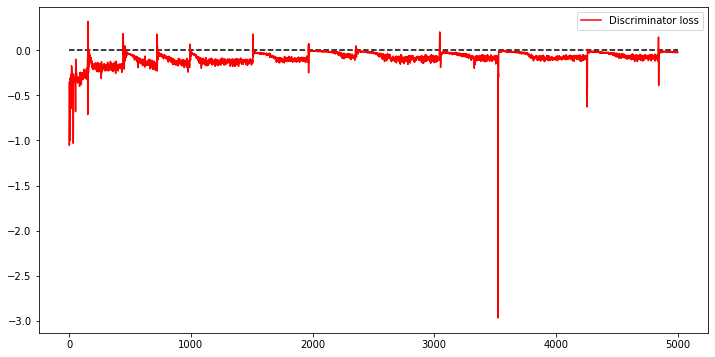

In [16]:
fig2_l

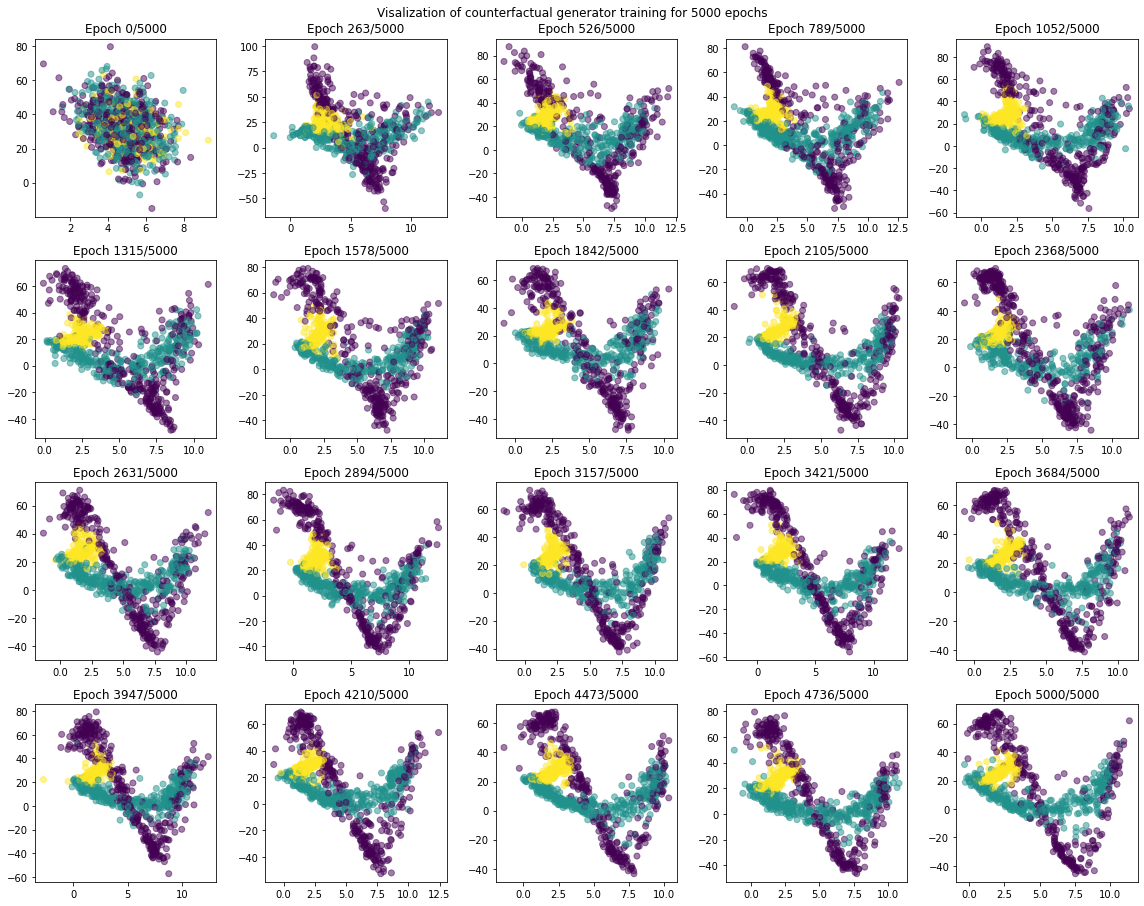

In [17]:
fig2_2D